# fiiling missing value by class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset_path = r'D:\HAROON\DATA SCIENCE\IndianAiProduction\04_Dataprocessing&FE\data\train.csv'
df = pd.read_csv(dataset_path)
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
df.shape

(1460, 81)

In [6]:
missing_value_per = df.isnull().sum()/df.shape[0] * 100
missing_value_col_gre_20 = missing_value_per[missing_value_per > 20].keys()
df2_drop_col = df.drop(columns=missing_value_col_gre_20)
df2_drop_col.shape

(1460, 76)

In [7]:
df3_num = df2_drop_col.select_dtypes(include=['int', 'float'])
df3_num.shape

(1460, 38)

In [8]:
df3_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [16]:
missing_num_var = [i for i in df3_num.columns if df3_num[i].isnull().sum() > 0]
df3_num[missing_num_var][df3_num[missing_num_var].isnull().any(axis=1)]

,LotFrontage,MasVnrArea,GarageYrBlt
7,NaN,240.0,1973.0
12,NaN,0.0,1962.0
14,NaN,212.0,1960.0
16,NaN,180.0,1970.0
24,NaN,0.0,1968.0
...,...,...,...
1443,NaN,0.0,1916.0
1446,NaN,189.0,1962.0
1449,21.0,0.0,NaN
1450,60.0,0.0,NaN


In [17]:
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [29]:
df[df.loc[:,'LotConfig'] == 'Inside']['LotFrontage'].replace(np.nan,(df[df.loc[:,'LotConfig'] == 'Inside']['LotFrontage'].mean()))

0       65.0
2       68.0
5       85.0
6       75.0
8       51.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1052, dtype: float64

In [32]:
df_copy = df.copy()
for i in df['LotConfig'].unique():
    df_copy.update(df[df.loc[:,'LotConfig'] == i]['LotFrontage']
                   .replace(np.nan,(df[df.loc[:,'LotConfig'] == i]['LotFrontage'].mean())))

In [33]:
df_copy.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [37]:
df_copy = df.copy()
missing_num_var
cat_var = ['LotConfig','MasVnrType','GarageType']
for i,j in zip(cat_var,missing_num_var):
    for a in df[i].unique():
        df_copy.update(df[df.loc[:,i] == a][j]
                   .replace(np.nan,(df[df.loc[:,i] == a][j].mean())))

In [43]:
df_copy[missing_num_var].isnull().sum()

LotFrontage     0
MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [45]:
df_copy[df_copy[['MasVnrType']].isnull().any(axis=1)]['MasVnrType']

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

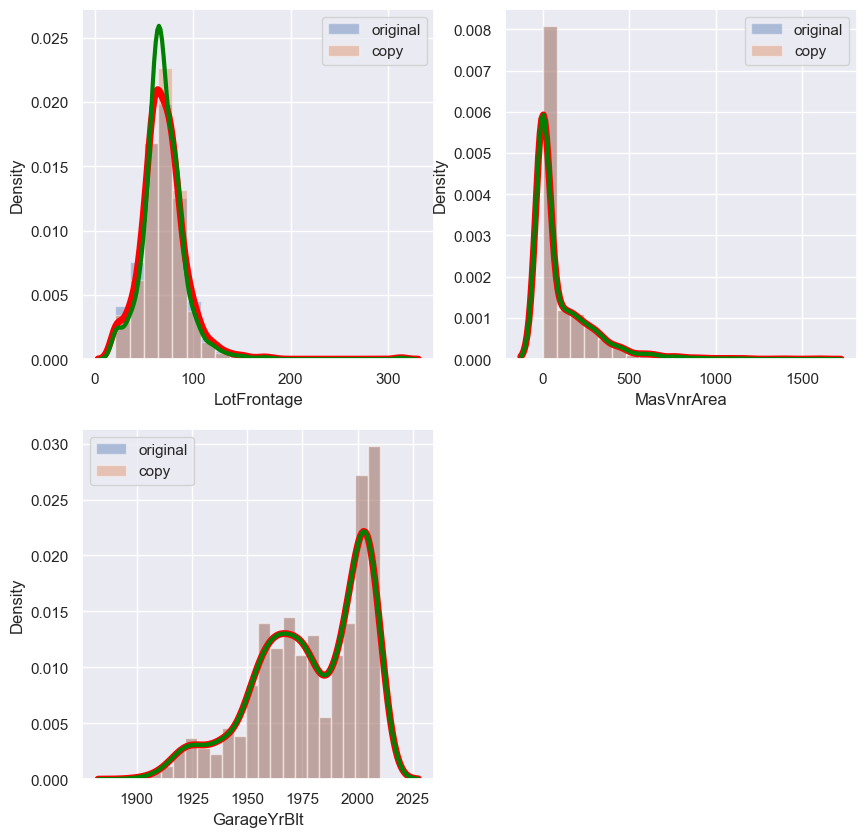

In [48]:
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var], bins=20,kde_kws={'linewidth':5, 'color':'red'},label="original")
    sns.distplot(df_copy[var], bins=20,kde_kws={'linewidth':3, 'color':'green'},label="copy")
    plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

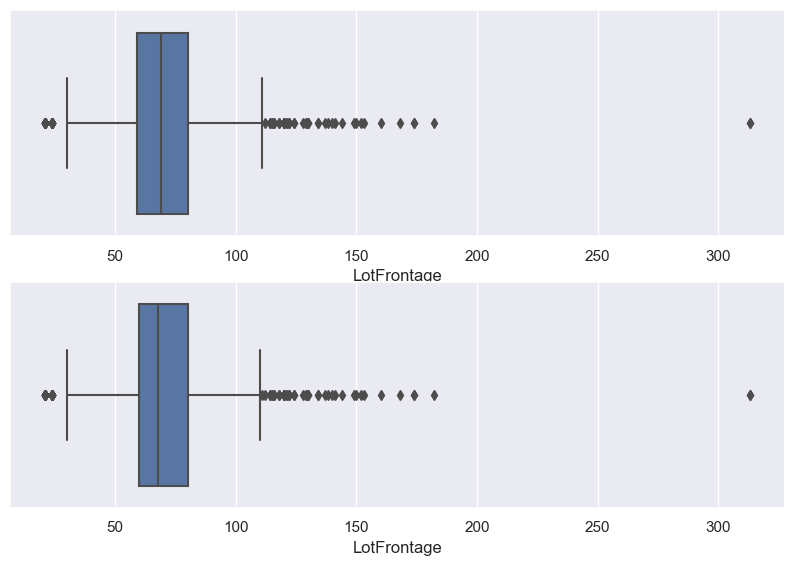

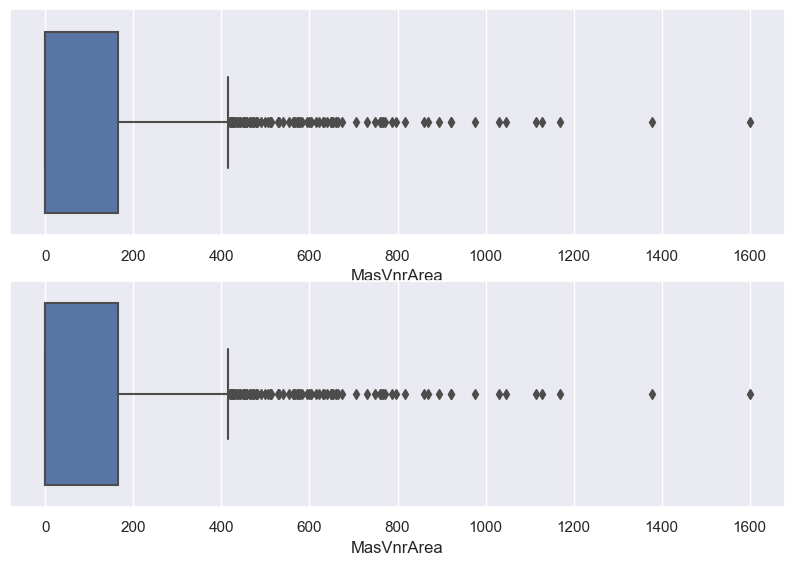

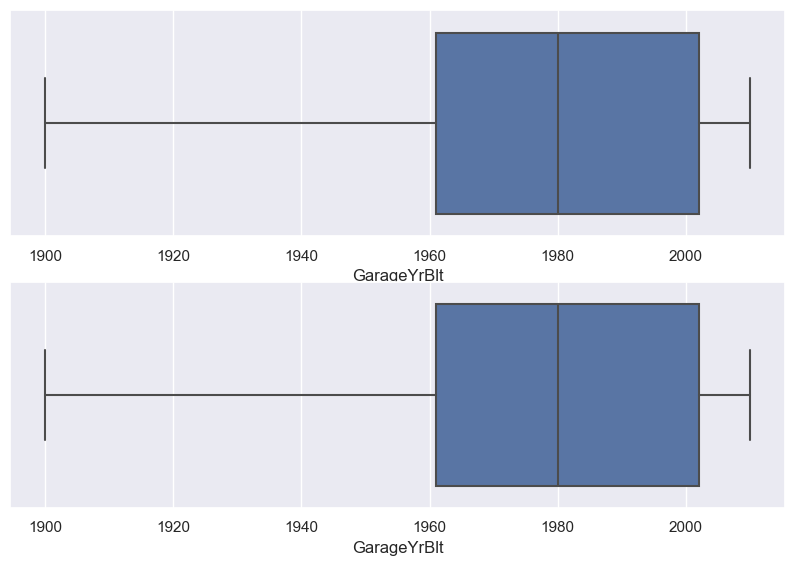

In [49]:
for i, var in enumerate(missing_num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df_copy[var])